In [1]:
import sys
import os

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import numpy as np

sys.path.append(os.getcwd())
from load_data import *
from plotting_tools import *

sys.path.append('../3_score/')
from optimize import Scores
from fingerprint import FuzzyFingerPrint

In [10]:
def get_data(
        receptor,
        rmsd_file = 'xrmsd.csv',
        glide = 'xglide',
        crystal_ifp = 'ifp/crystal_ifp_2/ifp.fp',
        glide_ifp = 'ifp/xglide_ifp_2',
        w = [10,10,10,1,0]
    ):
    
    data_set_dir = '/scratch/PI/rondror/docking_data/'+receptor
    glide_dir = '{}/{}/'.format(data_set_dir, glide)
    crystal_fp_file = '{}/{}'.format(data_set_dir, crystal_ifp)
    glide_fp_dir = '{}/{}/'.format(data_set_dir, glide_ifp)
    
    return load_data(data_set_dir, rmsd_file, glide_dir, crystal_fp_file, glide_fp_dir,w)

def sort_data(d):
    crystals, glides = d
    
    ligs = sorted(glides.keys())
    if receptor == 'HSP90': ligs = hsp90_ligs(ligs)
    if receptor == 'B2AR': ligs = b2ar_ligs(ligs)
        
    structs = []
    for l in ligs:
        structs.extend([i for i in glides[l] if i not in structs])
    structs.sort()

    new_glides = {l:{s:glides[l][s] for s in glides[l] if s in structs} for l in glides if l in ligs}

    return crystals, new_glides, ligs, structs

def hsp90_ligs(all_ligs):
    return [l for l in all_ligs if l not in ['4YKY', '4YKZ', '4YKX']]

def b2ar_ligs(all_ligs):
    return [l for l in all_ligs if l not in ['3P0G']]

def print_table(a):
    str1 = '|'
    str2 = '|'
    for i in ['min','ave','norm','opt','glide','us']:
        str1 = '{} {} |'.format(str1, i)
        str2 = '{} {} |'.format(str2, str(np.mean(a[i]))[:4])
    
    print str1
    print str2
                
def analyze(scores):
    a = scores.all_analysis
    plot_score_breakdown(scores)
    plot_n_rmsds(scores)
    #plot_clusters(scores)
    for i, l in enumerate(scores.ligands):
        #if a['us'][1][i] > 2 or a['us'][1][i] > a['glide'][1][i] + 1:
        print l
        print 'Ligand {}, structure {}, has an rmsd of {}'.format(l, scores.struct, a['us'][1][i])
        s = scores.get_final_scores(l)
        print 'Glide pose: {}. Score: {}.'.format(a['glide'][0][i], s[a['glide'][0][i]])
        print 'Best pose: {}. Score: {}.'.format(a['min'][0][i], s[a['min'][0][i]])
        print 'Our pose: {}. Score: {}.'.format(a['us'][0][i], s[a['us'][0][i]])
        print 'Neighbors: <lig> [pose_num, pair_score, rmsd]'
        scores.print_neighbors(l, a['us'][0][i])
        print '----------------'
        #for j, l2 in enumerate(scores.ligands):
            #if l == l2: continue
            #plot_all_poses(l, l2, scores, '{}, {}'.format(l, l2))
        
        #plot_scores_vs_rmsds(l, scores, lab=l)
            
    #return [a['glide'][1][:] for l in range(len(scores.ligands))])

In [3]:
def plot_fp_breakdown(fp_list, label_list, title):
    bd = {label_list[i]: fp_breakdown(fp_list[i]) for i in range(len(fp_list))}
    fp_ind = np.arange(len(fp_list))
    leg = {0:'res=hdonor', 1:'res=hacc', 2:'sb', 3:'lj', 4:''}
    plt.bar(fp_ind, [bd[l][0] for l in label_list], label=leg[0])
    for i in range(1,len(bd[label_list[0]])):
        prev = [sum([bd[l][i-n-1] for n in range(i)]) for l in label_list]
        plt.bar(fp_ind, [bd[l][i] for l in label_list], bottom=prev, label=leg[i])
    plt.gca().set_xticklabels(label_list, minor=False, rotation='vertical')
    plt.gca().set_xticks(np.arange(0,len(label_list),1))
    plt.legend()
    plt.title(title)
    plt.show()
    
def plot_docking_output(ligs, struct, xglides, n, gscore=True):
    for lig in ligs:
        print lig

        if struct not in xglides[lig]: 
            print 'struct not found. struct, lig: ', struct, lig
            continue
        poses = xglides[lig][struct].poses
        pnum = [i for i in poses.keys()]
        g1 = [poses[i].gscore for i in poses.keys()]
        rmsd = [poses[i].rmsd for i in poses.keys()]
        if gscore:
            plt.plot(g1[:n], rmsd[:n], '.', markersize=10, label=lig)
        else:
            plt.plot(pnum[:n], rmsd[:n], '.', markersize=10, label=lig)

    #plt.gca().set_ylim([0,12])
    #plt.gca().set_xlim([0,25])
    plt.legend()
    plt.show()

def plot_all_pairs(l1, l2, l3, scores):
    plot_all_poses(l1, l2, scores, l1+l2)
    plot_all_poses(l1, l3, scores, l1+l3)
    plot_all_poses(l2, l3, scores, l2+l3)

In [4]:
receptor = 'CHK1' # ['AR', 'B2AR', 'CHK1', 'CDK2']
(xcrystals, xglides, all_ligs, all_structs) = sort_data(get_data(receptor))

Loading crystal structures...
Loading glidescores...
0 of 169 total pairs failed to dock.
Loading fingerprints...
Loading docking results...


In [5]:
n = 25
best_rmsd_matrix = get_docking_stats(all_ligs, all_structs, xglides, n, lambda x: np.min(x) if x != [] else np.nan)

In [6]:
three_ligs = ['4FSW','4FSZ','4FT0']
struct = '4FT7'

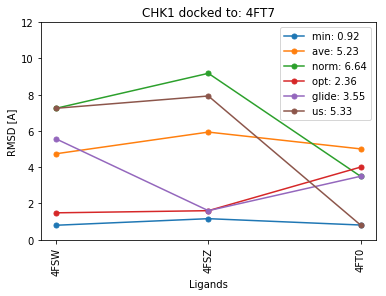

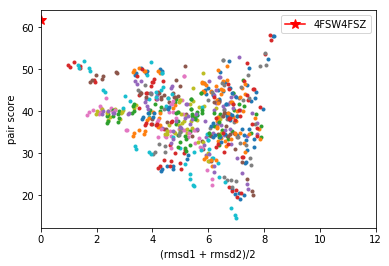

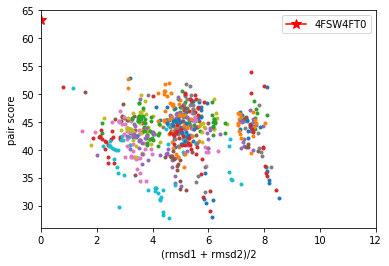

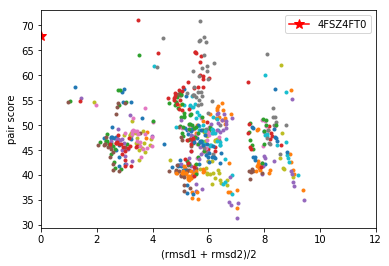

| min | ave | norm | opt | glide | us |
| 0.92 | 5.23 | 6.64 | 2.36 | 3.55 | 5.33 |


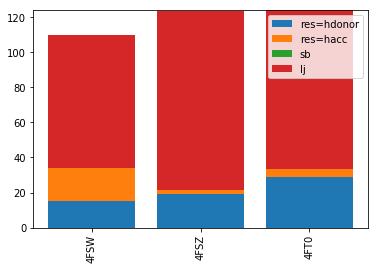

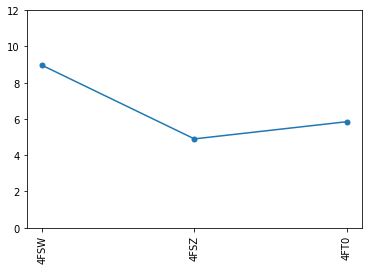

4FSW
Ligand 4FSW, structure 4FT7, has an rmsd of 7.252
Glide pose: 0.0. Score: 104.829601219.
Best pose: 3.0. Score: 102.919187361.
Our pose: 13.0. Score: 109.616506943.
Neighbors: (pose_num, pair_score, rmsd)
4FSZ [11.0, 58.138356464842772, 9.1809999999999992]
4FT0 [19.0, 51.478150477967006, 8.7360000000000007]
----------------
4FSZ
Ligand 4FSZ, structure 4FT7, has an rmsd of 7.929
Glide pose: 0.0. Score: 109.677783009.
Best pose: 5.0. Score: 107.272573231.
Our pose: 7.0. Score: 123.695822742.
Neighbors: (pose_num, pair_score, rmsd)
4FT0 [0.0, 70.763655774389051, 3.4980000000000002]
4FSW [4.0, 52.932166967390437, 6.3029999999999999]
----------------
4FT0
Ligand 4FT0, structure 4FT7, has an rmsd of 0.809
Glide pose: 0.0. Score: 122.487584352.
Best pose: 3.0. Score: 123.931589826.
Our pose: 3.0. Score: 123.931589826.
Neighbors: (pose_num, pair_score, rmsd)
4FSZ [23.0, 70.993528054871206, 6.133]
4FSW [0.0, 52.938061771336329, 5.5599999999999996]
----------------


/home/jbelk/.local/lib/python2.7/site-packages/ipykernel_launcher.py:59: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jbelk/.local/lib/python2.7/site-packages/ipykernel_launcher.py:60: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/jbelk/.local/lib/python2.7/site-packages/ipykernel_launcher.py:61: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [11]:
get_ipython().magic(u'matplotlib inline')

all_final = {}
(l1,l2,l3) = tuple(three_ligs)

good_poses = [best_rmsd_matrix[all_structs.index(struct)][all_ligs.index(l)] < 1.5 for l in three_ligs]

if False in good_poses: 
    print 'no good poses found for some ligands! proceed with caution...'

scores = Scores(xglides, xcrystals, three_ligs, struct, n)
final_rmsds = plot_final_rmsds(scores, receptor+' docked to: '+struct)

plot_all_pairs(l1,l2,l3,scores)

# print out our performance
a = scores.all_analysis
print_table({i:a[i][1][:] for i in a})

analyze(scores)

In [8]:
def mul_overlap(fp1, fp2):
    new_feats = {}
    for r in fp1.feats:
        if r in fp2.feats:
            new_feats[r] = np.multiply(fp1.feats[r], fp2.feats[r])
    return FuzzyFingerPrint(new_feats)

def add_overlap(fp1, fp2):
    new_feats = {}
    for r in fp1.feats:
        new_feats[r] = np.add(fp1.feats[r], fp2.feats.get(r,[0,0,0,0,0]))
    for r in fp2.feats:
        if r not in fp1.feats:
            new_feats[r] = fp2.feats[r]
    return FuzzyFingerPrint(new_feats)

def score_fp(fp):
    return np.sum([np.sum(np.square(np.square(fp.feats[r]))) for r in fp.feats])

def score_three_mul(fp1, fp2, fp3, overlap=mul_overlap):
    return score_fp(overlap(overlap(fp1, fp2), fp3))

def score_three_sum(fp1, fp2, fp3, overlap=mul_overlap):
    return score_fp(overlap(fp1, fp2))+score_fp(overlap(fp1, fp3))+score_fp(overlap(fp2, fp3))

def fp_breakdown(fp):
    bd = {}
    for r in fp.feats:
        for i, s in enumerate(fp.feats[r]):
            bd[i] = bd.get(i,0) + s
    return bd

In [9]:
# overlap = add_overlap

# pose_ind = [(-1,-1,-1)]
# x = [0]
# y_sum = [score_three_sum(xcrystals[l1].fp, xcrystals[l2].fp, xcrystals[l3].fp, overlap)]
# y_mul = [score_three_mul(xcrystals[l1].fp, xcrystals[l2].fp, xcrystals[l3].fp, overlap)]
# for p1 in range(n):
#     print p1
#     f1 = xglides[l1][struct].poses[p1]
#     for p2 in range(n):
#         f2 = xglides[l2][struct].poses[p2]
#         for p3 in range(n):
#             pose_ind.append((p1, p2, p3))
#             f3 = xglides[l3][struct].poses[p3]
#             x.append((f1.rmsd+f2.rmsd+f3.rmsd)/3)
#             y_sum.append(score_three_sum(f1.fp, f2.fp, f3.fp, overlap))
#             y_mul.append(score_three_mul(f1.fp, f2.fp, f3.fp, overlap))
# top_sum = int(np.argmax(y_sum[1:]) + 1)
# (p1_s, p2_s, p3_s) = pose_ind[top_sum]
# top_mul = int(np.argmax(y_mul[1:]) + 1)
# (p1_m, p2_m, p3_m) = pose_ind[top_mul]
# print 'Sum Objective RMSD: {}, Score: {}'.format(x[top_sum], y_sum[top_sum])
# print 'Top triplet: {}: {}. {}: {}. {}:{}.'.format(l1, p1_s, l2, p2_s, l3, p3_s)
# print 'Mul Objective RMSD: {}, Score: {}'.format(x[top_mul], y_mul[top_mul])
# print 'Top triplet: {}: {}. {}: {}. {}:{}.'.format(l1, p1_m, l2, p2_m, l3, p3_m)
# plt.plot(x, y_sum, '.')
# plt.title('Sum Objective: ' + struct)
# plt.show()
# plt.plot(x, y_mul, '.')
# plt.title('Mul Objective: ' + struct)
# plt.show()
# f_list_mul = [xglides[l1][struct].poses[p1_m].fp, xglides[l2][struct].poses[p2_m].fp, xglides[l3][struct].poses[p3_m].fp]
# f_list_sum = [xglides[l1][struct].poses[p1_s].fp, xglides[l2][struct].poses[p2_s].fp, xglides[l3][struct].poses[p3_s].fp]

# three_crystals = [xcrystals[l1].fp, xcrystals[l2].fp, xcrystals[l3].fp]
# plot_fp_breakdown(three_crystals + [overlap(three_crystals[0], three_crystals[1]),
#                   overlap(three_crystals[0], three_crystals[2]),
#                   overlap(three_crystals[1], three_crystals[2]),
#                   overlap(overlap(three_crystals[0], three_crystals[1]), three_crystals[2])],
#                   [l1, l2, l3, l1+l2, l1+l3, l2+l3, 'all'], 'Crystal Cluster. RMSD: 0')

# plot_fp_breakdown(f_list_mul + [overlap(f_list_mul[0], f_list_mul[1]),
#                   overlap(f_list_mul[0], f_list_mul[2]),
#                   overlap(f_list_mul[1], f_list_mul[2]),
#                   overlap(overlap(f_list_mul[0], f_list_mul[1]), f_list_mul[2])],
#                   [l1, l2, l3, l1+l2, l1+l3, l2+l3, 'all'], 'Top Mul Cluster. RMSD: {}'.format(x[top_mul]))

# plot_fp_breakdown(f_list_sum + [overlap(f_list_sum[0], f_list_sum[1]),
#                   overlap(f_list_sum[0], f_list_sum[2]),
#                   overlap(f_list_sum[1], f_list_sum[2]),
#                   overlap(overlap(f_list_sum[0], f_list_sum[1]), f_list_sum[2])],
#                   [l1, l2, l3, l1+l2, l1+l3, l2+l3, 'all'], 'Top Sum Cluster. RMSD: {}'.format(x[top_sum]))
    
# print 'average across all data:'
# print_table(all_final)